In [ ]:
import pandas as pd

# Load the CSV file with encoding fix
df = pd.read_csv('/content/superstore.csv', encoding='ISO-8859-1')

# Preview the data
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Shape of the dataset
print("Rows and Columns:", df.shape)

# Data types of each column
print("\nData Types:\n", df.dtypes)

# Column names
print("\nColumns:\n", df.columns)


Rows and Columns: (9994, 21)

Data Types:
 Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Columns:
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [ ]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [ ]:
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [7]:
import pandas as pd

df = pd.read_csv('/content/superstore.csv', encoding='ISO-8859-1')

# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [44]:
# Total Sales, Profit, and Quantity


print("Total Sales: ${:,.2f}".format(df['Sales'].sum()))
print("Total Profit: ${:,.2f}".format(df['Profit'].sum()))
print("Total Quantity Sold:", df['Quantity'].sum())

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Quantity Sold: 37873


In [19]:
# Sales by Category


df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


In [46]:
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Formating sales as currency
sales_by_category_formatted = sales_by_category.apply(lambda x: "${:,.2f}".format(x))

sales_by_category_formatted


,Sales
Category,
Technology,"$836,154.03"
Furniture,"$741,999.80"
Office Supplies,"$719,047.03"


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

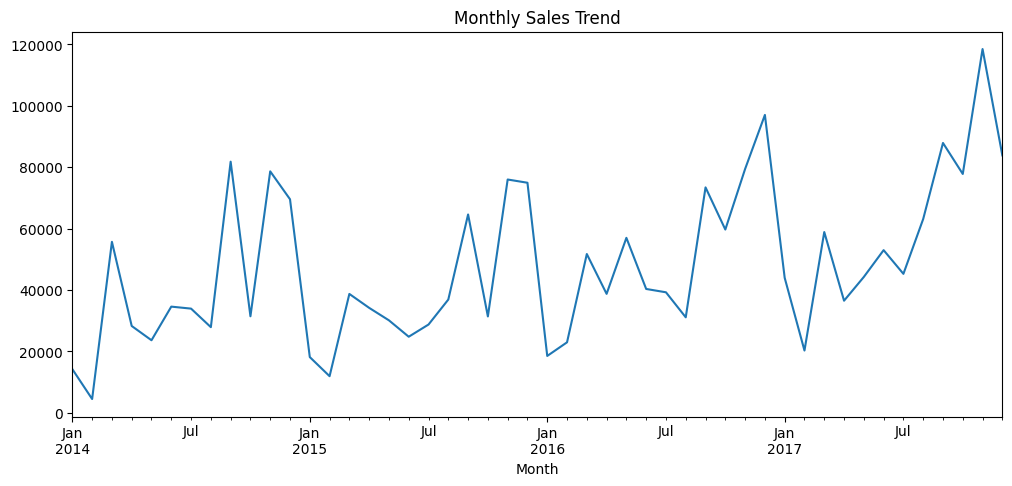

In [48]:
# Sales Trend Over Time

df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

# Plotting
monthly_sales.plot(kind='line', figsize=(12, 5), title='Monthly Sales Trend')


<Axes: title={'center': 'Top 10 Products by Sales'}, ylabel='Product Name'>

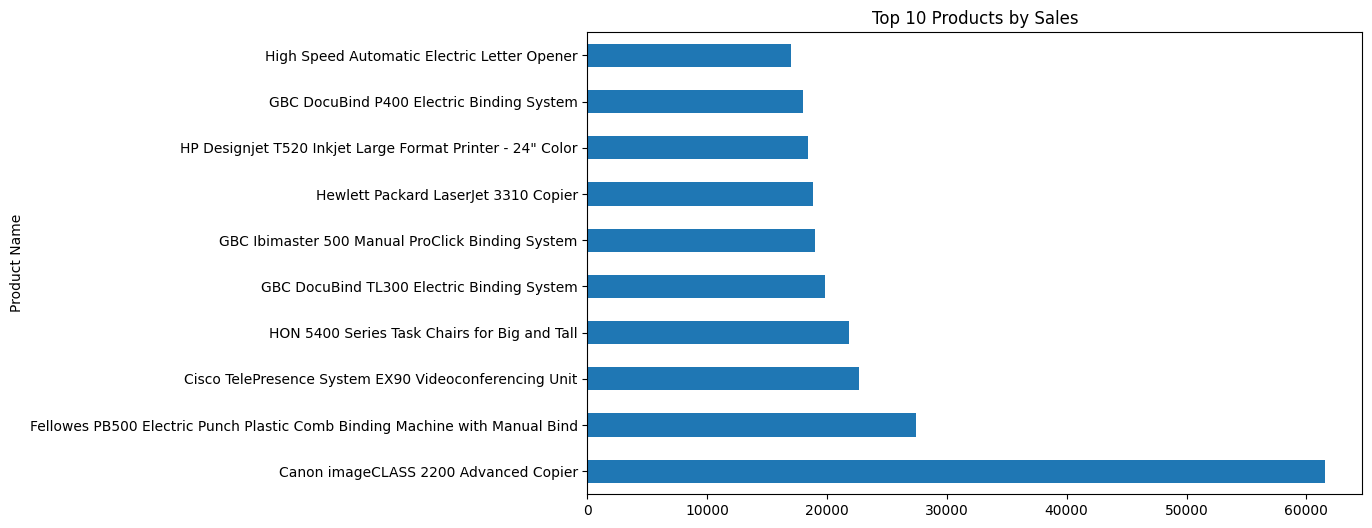

In [49]:
# Top 10 Products by Sales


top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting
top_products.plot(kind='barh', figsize=(10, 6), title='Top 10 Products by Sales')


<Axes: title={'center': 'Sales by Region'}, xlabel='Region'>

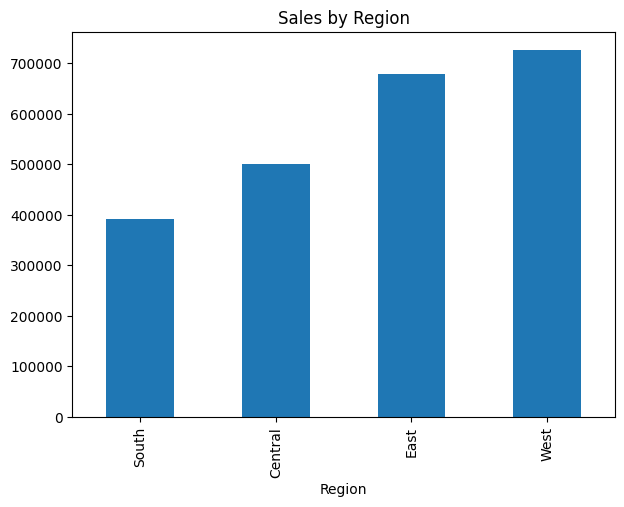

In [50]:
# Sales by Region

region_sales = df.groupby('Region')['Sales'].sum().sort_values()

region_sales.plot(kind='bar', figsize=(7, 5), title='Sales by Region')

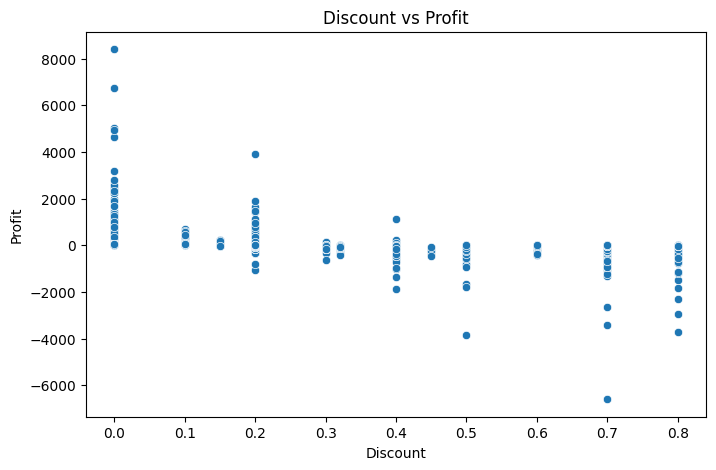

In [51]:
# Discount vs Profit Relationship

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.show()